In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
! pip install dataprep

# Boston Housing 


#### 소개 : The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

- CRIM - per capita crime rate by town 마을별 1인당 범죄율
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 25,000평방피트 이상의 부지에 구역화 된 주거용 토지 비율

- INDUS - proportion of non-retail business acres per town. 마을당 비 소매 사업 비지니스 에이커의 비율.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) Charles River 더미 변수(강  경계인 경우 1, 그렇지 않은 경우 0)
- NOX - nitric oxides concentration (parts per 10 million) 산화 질소 농도 (1,000만분 율) : 대기오염 지표
- RM - average number of rooms per dwelling 주거 당 평균 방 수
- AGE - proportion of owner-occupied units built prior to 1940 1940년 이전에 지어진 소유주 소유 유닛의 비율
- DIS - weighted distances to five Boston employment centres 보스턴 구직 센터 5곳까지의 가중 거리
- RAD - index of accessibility to radial highways 방사형 고속도로 접근성 지수
-TAX - full-value property-tax rate per $10,000 10,000달러당 재산세 전액 세율 : 세율

- PTRATIO - pupil-teacher ratio by town 마을 별 학생 대 교사 비율
-B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 마을별 흑인의 비율
- LSTAT - % lower status of the population 인구의 낮은 지위 %
-MEDV - Median value of owner-occupied homes in $1000's 소유주가 거주하는 주택의 중간 가치 (집가격, 단위 $1000, y변수)


In [ ]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

# 전처리 및 EDA

- 변수 : 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 
- 타켓 변수 : 'MEDV'

In [ ]:
# Dimension of the dataset
print(np.shape(house))

(506, 14)


In [ ]:
# Check the missing value
np.sum(pd.isnull(house))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# describe the distribution of data
house.describe()

CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

Data Report
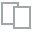
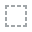
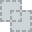
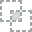
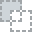
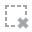
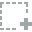
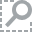
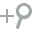
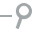
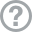
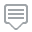
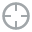
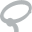
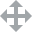
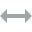
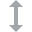
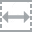
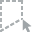
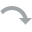
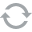
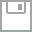
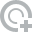
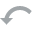
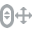
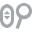
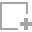
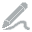
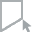
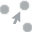
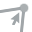
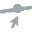

In [ ]:
from dataprep.eda import create_report
data_report = create_report(house, title='Data Report')
data_report

## Outlier

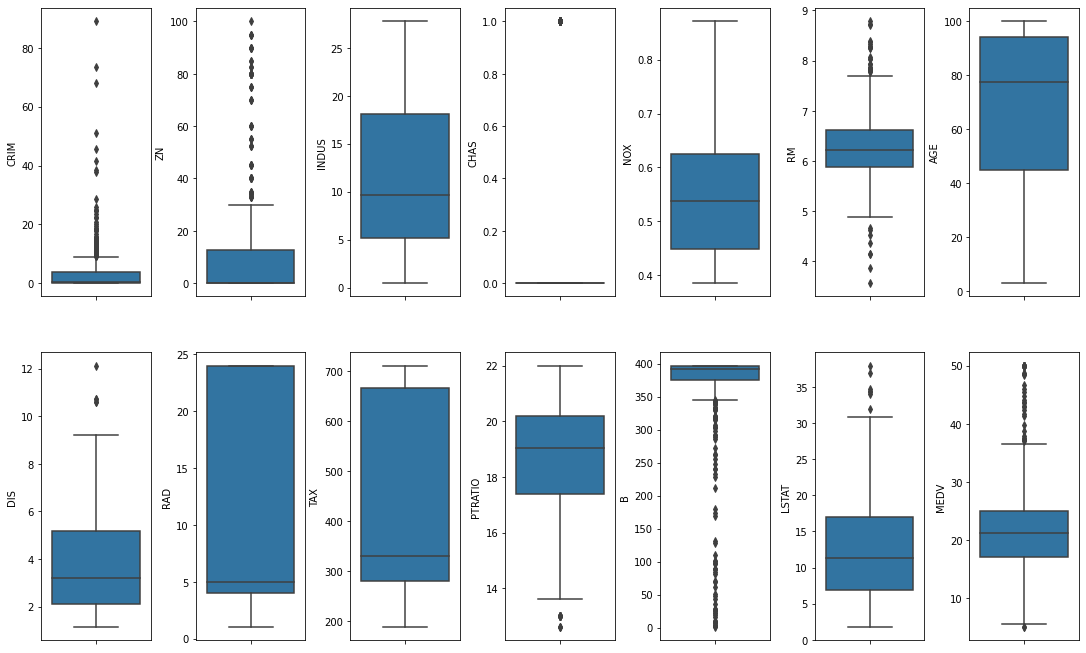

In [ ]:
# visualization - boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15,9))
index = 0
axs = axs.flatten()
for k,v in house.items():
    sns.boxplot(y=k, data=house, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# outlier 퍼센트  
for k, v in house.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(house)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


-> 특히 CRIM, ZN, B, MEDV 등 순으로 outlier 존재

In [ ]:
house['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
house.drop(['CHAS'],axis=1,inplace=True)

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = house.drop(['MEDV'], axis=1, inplace=False)
y = house['MEDV']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=156)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse= mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE : 17.477, RMSE : 4.181
Variance score : 0.755


In [ ]:
print('절편 값 : ', lr.intercept_ )
print('회귀 계수값 : ', np.round(lr.coef_,1))

절편 값 :  22.909887005649715
회귀 계수값 :  [-0.9  1.6  0.4 -2.3  2.5  0.2 -3.7  3.3 -2.6 -2.1  1.  -4.2]


In [ ]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 개별 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-38.44 -20.6  -37.51 -24.7  -16.78]
5 folds의 개별 RMSE scores :  [6.2  4.54 6.12 4.97 4.1 ]
5 folds의 개별 RMSE : 5.186


In [ ]:
df = pd.DataFrame({"Actual": y_test, "LR_Predict": y_preds})

# RANSACRegressor

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ran_model = ransac.fit(X_train, y_train)
ran_y_preds = ran_model.predict(X_test)

ran_neg_mse = cross_val_score(ran_model,X_train, y_train, scoring='neg_mean_squared_error',cv=5)
ran_rmse_scores = np.sqrt(-1*ran_neg_mse)
avg_rmse = np.mean(ran_rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(ran_neg_mse,2))
print('5 folds의 개별 RMSE scores : ', np.round(ran_rmse_scores,2))
print('5 folds의 개별 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-70.31 -36.07 -59.27 -36.67 -29.03]
5 folds의 개별 RMSE scores :  [8.39 6.01 7.7  6.06 5.39]
5 folds의 개별 RMSE : 6.707


In [ ]:
df['RANSAC_Predict'] = ran_y_preds
df 

Actual  LR_Predict  RANSAC_Predict
210    21.7   20.274743       18.557779
15     19.9   19.693340       20.023256
264    36.5   36.982422       28.974669
396    12.5   20.285588       14.987137
234    29.0   29.625665       23.370987
..      ...         ...             ...
393    13.8   21.415243       16.291739
325    24.6   24.670515       23.046959
53     23.4   24.199564       24.949499
401     7.2   18.746643       12.857963
178    29.9   32.099498       24.206703

[152 rows x 3 columns]

(10.0, 50.0, 10.0, 50.0)

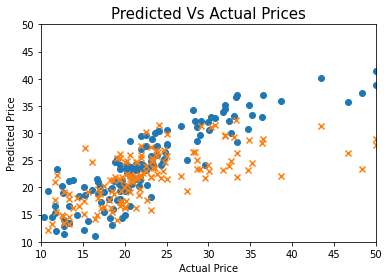

In [ ]:
plt.scatter(y_test, y_preds)
plt.scatter(y_test,ran_y_preds,marker='x')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted Vs Actual Prices", fontsize=15)
plt.axis([10,50,10,50])

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
neg_mse_scores =cross_val_score(ridge,X,y,scoring="neg_mean_squared_error", cv= 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 개별 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-11.55 -23.16 -28.71 -75.57 -30.41]
5 folds의 개별 RMSE scores :  [3.4  4.81 5.36 8.69 5.51]
5 folds의 개별 RMSE : 5.555


In [ ]:
alphas = [0,0.1,1,10,100]

for alpha in alphas :
  ridge=Ridge(alpha=alpha)
  neg_mse_scores =cross_val_score(ridge,X,y,scoring="neg_mean_squared_error", cv= 5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.773
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.741
alpha 1 일 때 5 folds의 평균 RMSE : 5.645
alpha 10 일 때 5 folds의 평균 RMSE : 5.555
alpha 100 일 때 5 folds의 평균 RMSE : 5.347


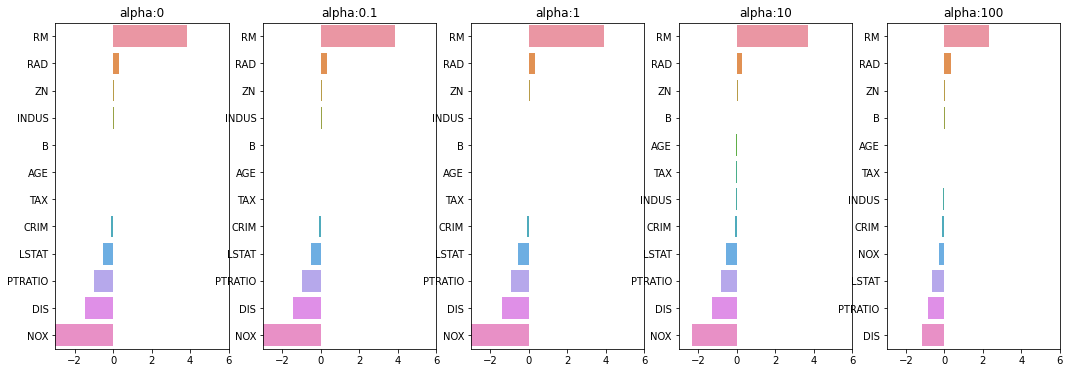

In [ ]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

alpha:0  alpha:0.1    alpha:1  alpha:10  alpha:100
RM        3.850492   3.858334   3.890827  3.727496   2.339810
RAD       0.328311   0.325699   0.311668  0.296401   0.320815
ZN        0.047052   0.047197   0.048026  0.050017   0.054656
INDUS     0.040311   0.035732   0.010595 -0.027579  -0.047854
B         0.009741   0.009794   0.010074  0.010335   0.009486
AGE       0.002784   0.001832  -0.003288 -0.008940   0.001833
TAX      -0.013756  -0.013831  -0.014251 -0.015008  -0.016184
CRIM     -0.113139  -0.112582  -0.109545 -0.105290  -0.103453
LSTAT    -0.534158  -0.535288  -0.542158 -0.566095  -0.663160
PTRATIO  -0.990958  -0.979006  -0.914063 -0.828463  -0.838930
DIS      -1.485374  -1.469729  -1.384179 -1.259663  -1.157028
NOX     -17.366999 -16.311641 -10.546404 -2.332452  -0.261259

# Lasso

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_train, y_train)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [ ]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_train, y_target_n=y_train)


#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 6.404 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 6.408 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 6.411 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.422 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.476 


In [ ]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         3.311717   3.230770   2.146960  0.774560  0.000000
RAD        0.296542   0.296366   0.298469  0.294768  0.119919
ZN         0.064089   0.064125   0.063391  0.062001  0.044410
B          0.010367   0.010313   0.009534  0.008495  0.006944
AGE       -0.015673  -0.014381   0.000083  0.020168  0.052169
TAX       -0.016061  -0.016149  -0.017050 -0.017608 -0.013729
INDUS     -0.017258  -0.016858  -0.000000 -0.000000 -0.000000
CRIM      -0.099903  -0.098870  -0.086313 -0.071270 -0.009550
NOX       -0.161638  -0.000000  -0.000000 -0.000000 -0.000000
LSTAT     -0.629253  -0.634886  -0.703485 -0.788478 -0.816762
PTRATIO   -0.774044  -0.769229  -0.735685 -0.688422 -0.214847
DIS       -1.434252  -1.409909  -1.147309 -0.828838 -0.000000

# ElasticNet

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_train, y_target_n=y_train)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 6.070 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.882 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.666 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.932 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.559 


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
RM         4.436876   4.237954   2.448060  1.300581  0.000000
RAD        0.449217   0.448343   0.425416  0.382673  0.197228
ZN         0.048283   0.048891   0.052584  0.052500  0.042597
B          0.003260   0.003657   0.007011  0.008845  0.009485
INDUS     -0.000000  -0.000010  -0.000000 -0.000000 -0.000000
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
AGE       -0.003540  -0.001681   0.015204  0.029116  0.054704
TAX       -0.018782  -0.018916  -0.019574 -0.019074 -0.013721
CRIM      -0.186260  -0.181592  -0.133042 -0.089135 -0.000000
LSTAT     -0.590256  -0.605307  -0.738272 -0.822661 -0.899724
PTRATIO   -0.684234  -0.689408  -0.714674 -0.690213 -0.449062
DIS       -1.092635  -1.084133  -0.959213 -0.782182 -0.188747

In [ ]:
import warnings
warnings.filterwarnings( 'ignore' )

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

elastic = ElasticNet()
param = {'alpha' : [ 0.07, 0.1, 0.5, 1, 3], 'l1_ratio' : [0.1,0.3,0.5,0.7,0.9]}

inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=1)

# Perform nested cross-validation
clf = GridSearchCV(estimator=elastic, param_grid=param, cv=inner_cv, iid=False)
clf.fit(X_train, y_train)
best_estimator = clf.best_estimator_
print(clf.best_params_)
cv_dic = cross_validate(clf, X_train, y_train, cv=outer_cv)
mean_val_score = cv_dic['test_score'].mean()
print('nested_val_scores:   ', cv_dic['test_score'])
print('mean score: {0:.2f}'.format(mean_val_score))
 

{'alpha': 0.07, 'l1_ratio': 0.9}
nested_val_scores:    [0.69989465 0.6623462  0.6904137  0.7176696 ]
mean score: 0.69
